In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'game_logs.csv'  # Update with the path to your CSV file
game_logs = pd.read_csv(file_path, low_memory=False)


In [9]:
for column in game_logs.columns:
    print(column)

index
date
number_of_game
day_of_week
v_name
v_league
v_game_number
h_name
h_league
h_game_number
v_score
h_score
length_outs
day_night
completion
forefeit
protest
park_id
attendance
length_minutes
v_line_score
h_line_score
v_at_bats
v_hits
v_doubles
v_triples
v_homeruns
v_rbi
v_sacrifice_hits
v_sacrifice_flies
v_hit_by_pitch
v_walks
v_intentional walks
v_strikeouts
v_stolen_bases
v_caught_stealing
v_grounded_into_double
v_first_catcher_interference
v_left_on_base
v_pitchers_used
v_individual_earned_runs
v_team_earned_runs
v_wild_pitches
v_balks
v_putouts
v_assists
v_errors
v_passed_balls
v_double_plays
v_triple_plays
h_at_bats
h_hits
h_doubles
h_triples
h_homeruns
h_rbi
h_sacrifice_hits
h_sacrifice_flies
h_hit_by_pitch
h_walks
h_intentional walks
h_strikeouts
h_stolen_bases
h_caught_stealing
h_grounded_into_double
h_first_catcher_interference
h_left_on_base
h_pitchers_used
h_individual_earned_runs
h_team_earned_runs
h_wild_pitches
h_balks
h_putouts
h_assists
h_errors
h_passed_balls
h_

# Raw Dataset Analysis

In [ ]:
# Display basic information about the dataset
print("Data Information:")
game_logs.info()
print("\nFirst few rows of the dataset:")
display(game_logs.head())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Columns: 162 entries, index to acquisition_info
dtypes: float64(77), int64(7), object(78)
memory usage: 212.5+ MB

First few rows of the dataset:


,index,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,0,18710504,0,Thu,CL1,na,1,FW1,na,1,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,1,18710505,0,Fri,BS1,na,1,WS3,na,1,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,2,18710506,0,Sat,CL1,na,2,RC1,na,1,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,3,18710508,0,Mon,CL1,na,3,CH1,na,1,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,4,18710509,0,Tue,BS1,na,2,TRO,na,1,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y


In [ ]:
# Check for missing values
print("\nMissing Values Summary:")
missing_values = game_logs.isnull().sum()
display(missing_values[missing_values > 0])


Missing Values Summary:


length_outs            31066
day_night              31757
completion            171791
forefeit              171762
protest               171727
                       ...  
h_player_9_id          31069
h_player_9_name        31069
h_player_9_def_pos     31069
additional_info       170451
acquisition_info       31066
Length: 145, dtype: int64

In [ ]:
# Convert the date column if needed
if 'Date' in game_logs.columns:
    game_logs['Date'] = pd.to_datetime(game_logs['Date'], format='%Y%m%d', errors='coerce')

In [ ]:
# Create new features based on project objectives
# For example, extracting year and month from date for seasonality analysis
if 'Date' in game_logs.columns:
    game_logs['Year'] = game_logs['Date'].dt.year
    game_logs['Month'] = game_logs['Date'].dt.month


In [ ]:
# Basic descriptive statistics
print("\nDescriptive Statistics:")
display(game_logs.describe())



Descriptive Statistics:


,index,date,number_of_game,v_game_number,h_game_number,v_score,h_score,length_outs,attendance,length_minutes,...,v_player_9_def_pos,h_player_1_def_pos,h_player_2_def_pos,h_player_3_def_pos,h_player_4_def_pos,h_player_5_def_pos,h_player_6_def_pos,h_player_7_def_pos,h_player_8_def_pos,h_player_9_def_pos
count,171907.0000,1.719070e+05,171907.000000,171907.000000,171907.000000,171907.000000,171907.000000,140841.000000,118877.000000,136701.000000,...,140835.000000,140838.000000,140838.000000,140838.000000,140838.000000,140838.000000,140838.000000,140838.000000,140838.000000,140838.000000
mean,85953.0000,1.953462e+07,0.260897,76.929887,76.953806,4.420582,4.701461,53.619976,20184.247188,150.903329,...,1.894778,6.462560,5.914767,6.435770,5.922982,5.786144,5.497628,4.956184,4.080078,1.895873
std,49625.4207,4.149326e+05,0.605667,45.178029,45.162564,3.278489,3.355605,5.571512,14257.381902,34.748160,...,1.939072,1.813946,1.946100,2.306364,2.529624,2.521525,2.446669,2.264262,2.167098,1.936534
min,0.0000,1.871050e+07,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,24.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42976.5000,1.918052e+07,0.000000,38.000000,38.000000,2.000000,2.000000,51.000000,7962.000000,125.000000,...,1.000000,5.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000
50%,85953.0000,1.953053e+07,0.000000,76.000000,76.000000,4.000000,4.000000,54.000000,18639.000000,150.000000,...,1.000000,7.000000,6.000000,7.000000,7.000000,6.000000,5.000000,5.000000,4.000000,1.000000
75%,128929.5000,1.989051e+07,0.000000,115.000000,115.000000,6.000000,6.000000,54.000000,31242.000000,173.000000,...,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,6.000000,6.000000,1.000000
max,171906.0000,2.016100e+07,3.000000,165.000000,165.000000,49.000000,38.000000,156.000000,99027.000000,1245.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


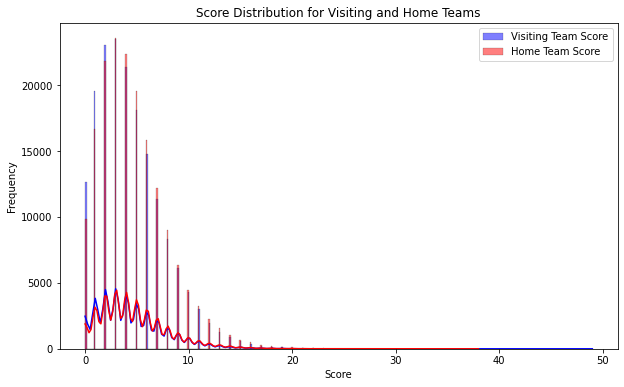

In [ ]:
# Exploratory Analysis - Distribution of Scores
plt.figure(figsize=(10, 6))
sns.histplot(game_logs['v_score'], kde=True, color='blue', label='Visiting Team Score')
sns.histplot(game_logs['h_score'], kde=True, color='red', label='Home Team Score')
plt.title('Score Distribution for Visiting and Home Teams')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<ipython-input-37-07f476443399>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_counts.index, y=win_counts.values, palette='viridis')


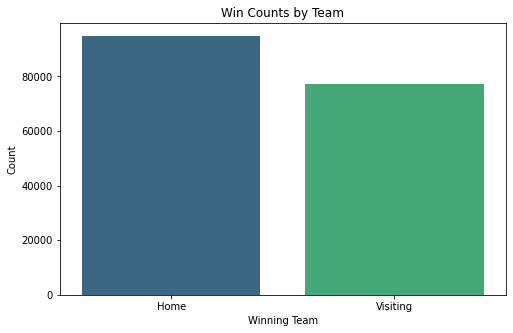

In [ ]:
# Win/Loss Analysis - Identifying winning team
game_logs['Winning Team'] = np.where(game_logs['v_score'] > game_logs['h_score'], 'Visiting', 'Home')
win_counts = game_logs['Winning Team'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=win_counts.index, y=win_counts.values, palette='viridis')
plt.title('Win Counts by Team')
plt.xlabel('Winning Team')
plt.ylabel('Count')
plt.show()

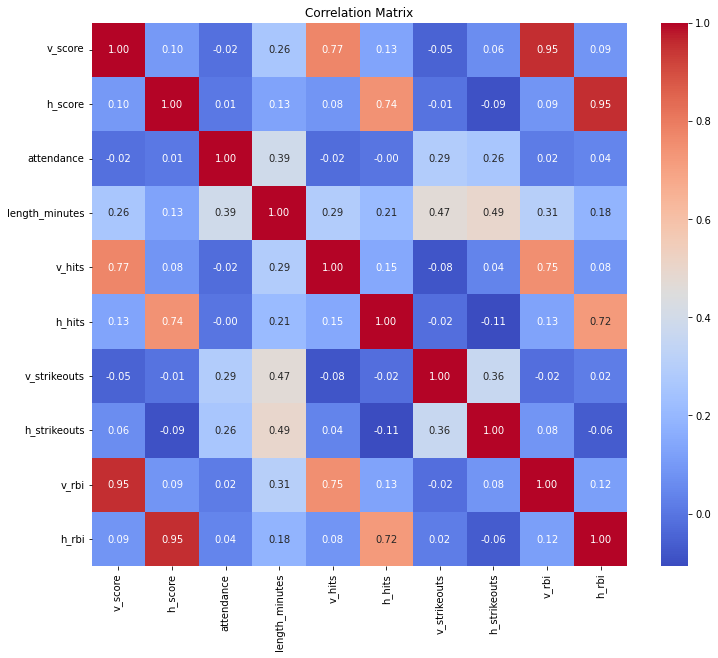

In [ ]:
# Recent Performance Analysis - Creating win streak features
game_logs['Visiting Win'] = game_logs['Winning Team'] == 'Visiting'
game_logs['Home Win'] = game_logs['Winning Team'] == 'Home'

# Rolling wins in recent games
game_logs['Visiting Win Streak'] = game_logs.groupby('v_name')['Visiting Win'].cumsum()
game_logs['Home Win Streak'] = game_logs.groupby('h_name')['Home Win'].cumsum()

# Correlation analysis to identify potential predictive features
plt.figure(figsize=(12, 10))
correlation = game_logs[['v_score', 'h_score', 'attendance', 'length_minutes', 
                         'v_hits', 'h_hits', 'v_strikeouts', 'h_strikeouts', 
                         'v_rbi', 'h_rbi']].corr()  # Adjust columns as needed for analysis
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Save the updated dataset for future modeling
game_logs.to_csv('game_logs_eda.csv', index=False)

# Create Aggregated Columns (DON'T RUN)

In [10]:
# take subset of dataset where date is after 2000 to shorten running time
game_logs_copy = game_logs
game_logs = game_logs[game_logs["date"] > 20000101].reset_index()

In [11]:
# create new columns h_game_no and v_game_no to identify which game they play
game_dict = {}
h_game_no = []
v_game_no = []
for index, row in game_logs.iterrows():
    if row["v_name"] not in game_dict:
        game_dict[row["v_name"]] = 1
        v_game_no.append(1)
    elif row["v_name"] in game_dict:
        game_dict[row["v_name"]] += 1
        v_game_no.append(game_dict[row["v_name"]])

    if row["h_name"] not in game_dict:
        game_dict[row["h_name"]] = 1
        h_game_no.append(1)
    elif row["h_name"] in game_dict:
        game_dict[row["h_name"]] += 1
        h_game_no.append(game_dict[row["h_name"]])

In [12]:
# apply the columns
game_logs["v_game_no"] = v_game_no
game_logs["h_game_no"] = h_game_no

In [13]:
# input: column name col_name to aggregate, aggregate past n games, vh "v" or "h" for visiting or home stat
# output: two new aggregate columns for home and visitng team
# takes about 27 minutes to run for n = 10
def agg_col(col_name, n, vh):

    output = []
    for index, row in game_logs.iterrows():
        if vh == "v" and row["v_game_no"] <= n:
            output.append(-1)
        if vh == "h" and row["h_game_no"] <= n:
            output.append(-1)

        if vh == "v" and row["v_game_no"] > n:
            team = row["v_name"]
            cur_game = row["v_game_no"]
            running_sum = 0
            for i in range(n):
                to_add = game_logs[((game_logs["v_name"]==team)&(game_logs["v_game_no"]==cur_game-i)|(game_logs["h_name"]==team)&(game_logs["h_game_no"]==cur_game-i))][col_name]
                running_sum += float(to_add)
            output.append(running_sum/n)
        if vh == "h" and row["h_game_no"] > n:
            team = row["h_name"]
            cur_game = row["h_game_no"]
            running_sum = 0
            for i in range(n):
                to_add = game_logs[((game_logs["v_name"]==team)&(game_logs["v_game_no"]==cur_game-i)|(game_logs["h_name"]==team)&(game_logs["h_game_no"]==cur_game-i))][col_name]
                running_sum += float(to_add)
            output.append(running_sum/n)

    return output

In [14]:
game_logs["v_last_10_score"] = agg_col("v_score",10,"v")
game_logs["h_last_10_score"] = agg_col("h_score", 10, "h")
game_logs["h_last_10_hits"] = agg_col("h_hits", 10, "h")
game_logs["v_last_10_hits"] = agg_col("v_hits", 10, "v")
game_logs["v_last_10_rbi"] = agg_col("v_rbi", 10, "v")
game_logs["h_last_10_rbi"] = agg_col("h_hits", 10, "h")
game_logs["v_last_10_walks"] = agg_col("v_walks", 10, "v")
game_logs["h_last_10_walks"] = agg_col("h_walks", 10, "h")
game_logs["v_last_10_errors"] = agg_col("v_errors", 10, "v")
game_logs["h_last_10_errors"] = agg_col("h_errors", 10, "h")
game_logs["v_last_10_dp"] = agg_col("v_double_plays", 10, "v")
game_logs["h_last_10_dp"] = agg_col("h_double_plays", 10, "h")
game_logs.to_csv("game_logs_agg.csv")

/var/folders/3_/bb1v7fy17dx550cj4n2swmsc0000gn/T/ipykernel_97457/545698507.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  running_sum += float(to_add)
/var/folders/3_/bb1v7fy17dx550cj4n2swmsc0000gn/T/ipykernel_97457/545698507.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  running_sum += float(to_add)
/var/folders/3_/bb1v7fy17dx550cj4n2swmsc0000gn/T/ipykernel_97457/545698507.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  running_sum += float(to_add)
/var/folders/3_/bb1v7fy17dx550cj4n2swmsc0000gn/T/ipykernel_97457/545698507.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  runni

# Aggregated Dataset Analysis